## Food insecurity in the U.S

The United Nations Food and Agriculture Organization publication, The State of Food Security and Nutrition in the World 2022 (https://www.fao.org/documents/card/en/c/cc0639en) might lead one to the conclusion that it's an elsewhere problem. That the people who are suffering malnutrition and starvation are "elsewhere", not in our backyard. For this assignment you will need to take a closer look here at home (the US)

Notes:

You will need to locate and source data that reflects food security and nutrition by state broken down by men, women, children and by age groups

Your analysis should demonstrate correlations that exist between level of poverty and food insecurity, malnutrition and starvation.

Your data and analysis should also indicate what happens to the children as they mature into adults. Will they become fully functional citizens or will they require continued support?

You data visualizations need to tell the story for a political audience that you were lobbying to address the issue of food insecurity in the US

This assignment is due at the end of the week twelve of the semester.

Data soruces: 
1) https://map.feedingamerica.org
2) https://www.census.gov/library/publications/2024/demo/p60-283.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image

## Data importing

In [2]:
proverty_df = pd.read_csv('https://raw.githubusercontent.com/stormwhale/data-mines/refs/heads/main/HDPulse_data_export.csv')
df = pd.read_csv('https://raw.githubusercontent.com/stormwhale/data-mines/refs/heads/main/MMG2024_2019-2022_Data_ToShare_v3.csv')
df.head()


,FIPS,State Name,State,Year,Overall Food Insecurity Rate,# of Food Insecure Persons Overall,Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",SNAP Threshold in State,...,# of Food Insecure Children,% food insecure Children in HH w/HH Incomes Below 185 FPL,% food insecure Children in HH w/HH Incomes Above 185 FPL,Senior Food Insecurity Rate,# of Food Insecure Seniors,Older Adult Food Insecurity Rate,# of Food Insecure Older Adults,Cost Per Meal,Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall
0,1,Alabama,AL,2019,16.10%,"788,250",27%,13%,12%,130%,...,"229,880",76%,24%,9.40%,"105,776",15.60%,"105,533",$3.01,$16.96,"$405,611,000"
1,1,Alabama,AL,2020,14.50%,"711,370",27%,14%,10%,130%,...,"216,040",82%,18%,9.00%,"104,269",14.20%,"97,677",$3.13,$16.62,"$358,615,000"
2,1,Alabama,AL,2021,14.80%,"746,550",26%,12%,10%,130%,...,"204,830",77%,23%,8.90%,"103,567",14.40%,"100,289",$3.50,$20.36,"$461,137,000"
3,1,Alabama,AL,2022,17.40%,"884,270",31%,18%,12%,130%,...,"258,560",75%,25%,9.20%,"109,300",13.40%,"87,500",$3.91,$24.24,"$650,301,000"
4,2,Alaska,AK,2019,11.90%,"86,970",18%,14%,9%,130%,...,"28,850",72%,28%,6.70%,"8,609",10.70%,"9,576",$3.63,$20.43,"$53,905,000"


## Data Cleaning

In [3]:
#Changing all columns with % at the end to numeric:
percent_cols = [col for col in df.columns if df[col].dtype =='object' and df[col].str.endswith('%').any()]
for col in percent_cols:
    df[col] = df[col].str.rstrip('%').astype(float)

#Change all columns with $ to numeric:
dollar_cols = [col for col in df.columns if df[col].dtype =='object' and df[col].str.startswith('$').any()]
for col in dollar_cols:
    df[col] = df[col].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

#Replace columns with commas to numeric:
comma_cols = [col for col in df.columns if df[col].dtype =='object' and df[col].str.contains(',').any()]
for col in comma_cols:
    df[col] = df[col].str.replace(',', '', regex=False).astype(float)
    
#remove empty spaces in column names:
df.columns = df.columns.str.strip()
    
#Merging two dataframes:
df_avg = df[['State Name', 'Overall Food Insecurity Rate']].groupby(['State Name']).mean().reset_index()
df_avg.columns = ['State', 'Avg Food Insecurity Rate']

#Rename columns for merging:
proverty_df.rename(columns={'Value (Percent)': 'Poverty Rate'}, inplace=True)

#Merge with food insecurity with poverty rate:
merged_df = pd.merge(df_avg, proverty_df, on='State', how='inner')

## Plot 1: Does food insecurity really happen in America?

In [4]:
df_1m = df[df['# of Food Insecure Persons Overall'] >= 600000]
df_1m = df_1m.groupby('State')['# of Food Insecure Persons Overall'].mean().reset_index()

total_states = len(df['State'].unique())
states_ins = len(df_1m['State'].unique()) / total_states * 100


fig = px.choropleth(
    df_1m,
    locations = 'State',
    locationmode = 'USA-states',
    scope = 'usa',
    color = '# of Food Insecure Persons Overall',
    color_continuous_scale = 'reds',
    title = f'<b style="color:red; font-size:30px">{states_ins:.0f}%</b> of the States In the U.S. has more than <b style="color:red; font-size:30px">600,000</b> people with food insecurity.',
    subtitle = 'Data Source: Feeding America (2019-2022 Average)'
    )
fig.update_layout(
    width=800,
    height=500
)

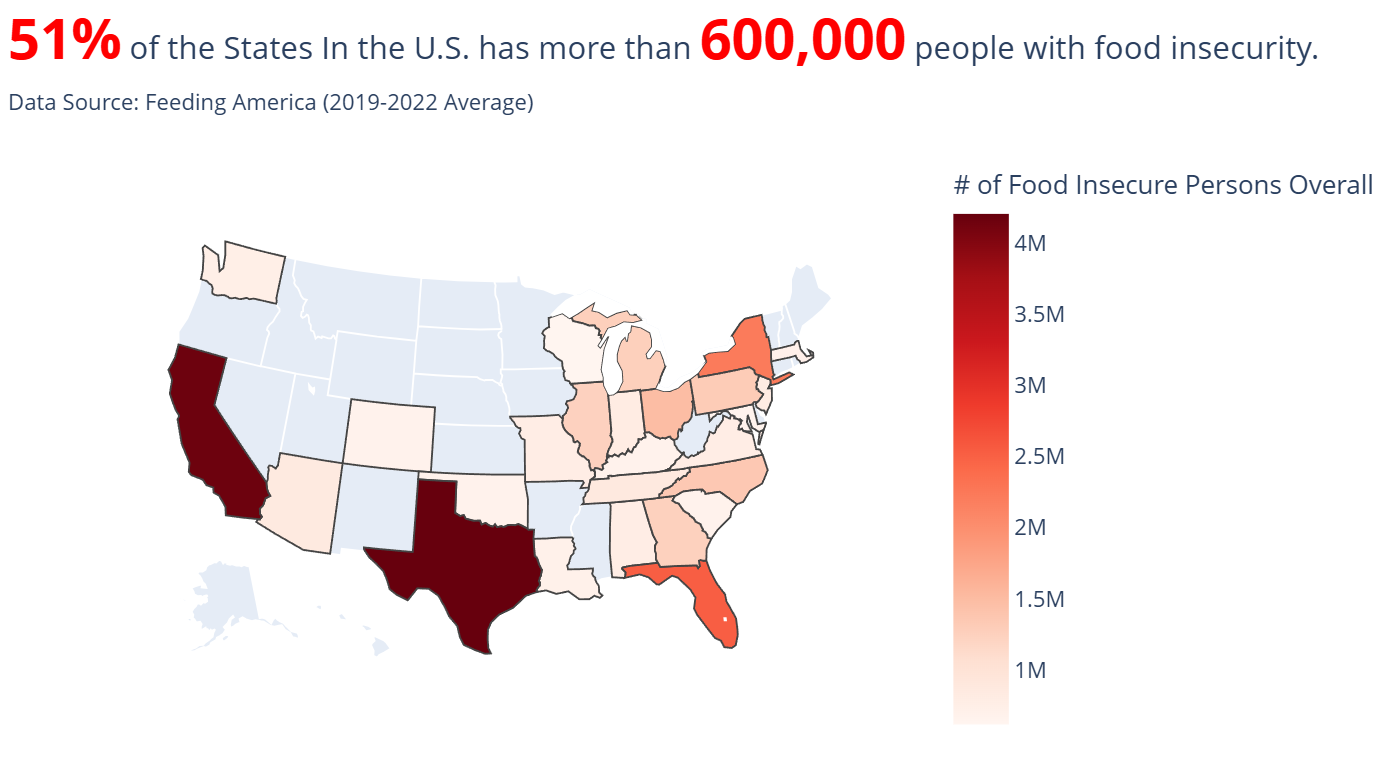

In [5]:
Image('1.png', width = 800, height = 600)


## Plot 2: Who are being affected by of Food Insecurity?

Text(0.5, 1.0, 'Children are consistently vulnerable to food insecurity')

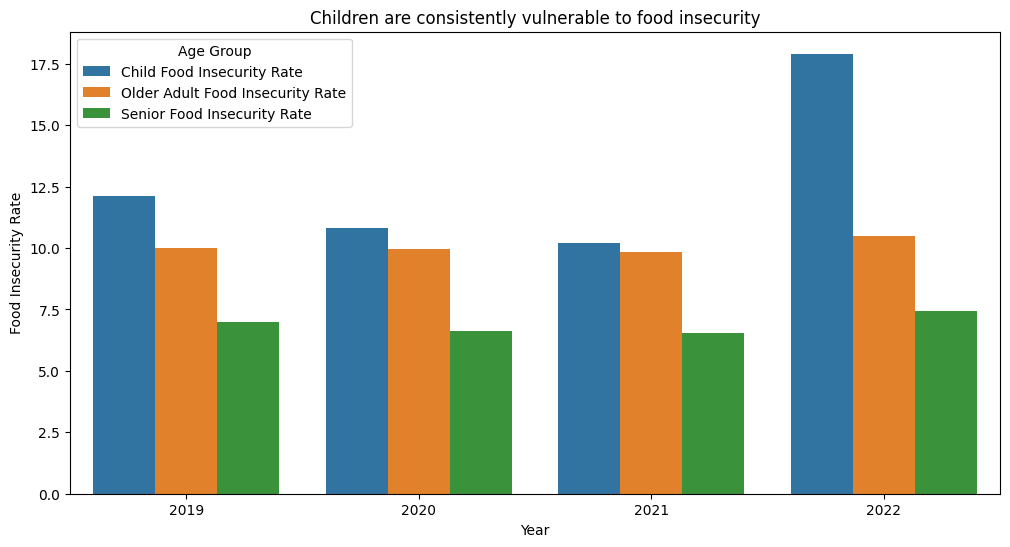

In [6]:
df_age_num = df[['Year', 'Child Food Insecurity Rate', 'Older Adult Food Insecurity Rate', 'Senior Food Insecurity Rate', ]].melt(id_vars='Year', var_name='Age Group', value_name='Food Insecurity Rate')
df_age_num = df_age_num.groupby(['Year', 'Age Group'])['Food Insecurity Rate'].mean().round(2).reset_index()
stage = [
    'Child Food Insecurity Rate',
    'Older Adult Food Insecurity Rate',
    'Senior Food Insecurity Rate'
]

plt.figure(figsize=(12, 6 ))
sns.barplot(
    df_age_num,
    x = 'Year',
    y = 'Food Insecurity Rate',
    hue = 'Age Group')
plt.title('Children are consistently vulnerable to food insecurity')



## Plot 3: What is the root cause?

Text(0, 0.5, 'Average Food Insecurity Rate (%) 2019-2022')

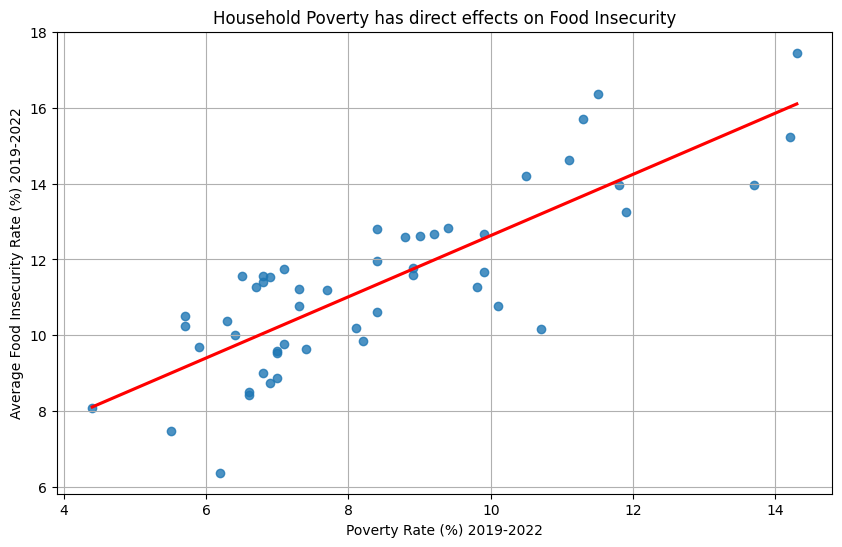

In [7]:
plt.figure(figsize = (10, 6))
sns.regplot(data=merged_df,
            x='Poverty Rate',
            y='Avg Food Insecurity Rate',
            line_kws={'color':'red'},
            ci=None)
plt.grid(True)
plt.title('Household Poverty has direct effects on Food Insecurity')
plt.xlabel('Poverty Rate (%) 2019-2022')
plt.ylabel('Average Food Insecurity Rate (%) 2019-2022')

## Plot 4: States disparity

In [8]:
# 1. Filter and calculate the national average (df_child_avg) before grouping
child_avg = df['# of Food Insecure Children'].mean()

# 2. Calculate the above-average percentage for EACH STATE-YEAR combination
df['abv_avg'] = (df['# of Food Insecure Children'] - child_avg) / child_avg * 100

# 3. Create the final aggregated DataFrame for plotting
# Group by state and take the mean of the percentage column
df_chil = df.groupby('State')['abv_avg'].mean().reset_index()

# --- Plotting DataFrame Preparation ---
# 4. Create the boolean color column (for highlighting states)
df_chil['is_above_100_percent'] = df_chil['abv_avg'] > 100

# 5. Create the formatted text column
df_chil['abv_avg_text'] = df_chil['abv_avg'].apply(lambda x: f'{x:.0f}%')
df_chil_avg = df_chil.sort_values(by='abv_avg', ascending=True)

df_chil_avg['highlight_text'] = np.where(
    df_chil_avg['abv_avg'] > 100,
    df_chil_avg['abv_avg'].apply(lambda x: f'{x:.0f}%'),
    ''
)

# --- Plotly Chart ---
fig = px.bar(
    df_chil_avg,
    y='State',
    x='abv_avg',
    # Use the Boolean column directly from the aggregated dataframe
    color='is_above_100_percent',
    color_discrete_map={True: 'salmon', False: 'grey'},
    text='highlight_text',
    orientation='h', # Ensure the chart is horizontal
    title='4 States Significantly Higher than the National Average for Food Insecure Children'
)
fig.update_traces(textposition='outside',
                  textfont=dict(size=16))

# Add the reference line
fig.add_vline(x=100, line_dash="dash", line_color="red")
fig.add_annotation(
    x=200,
    y=20,  
    text="100% Above National Average Line",
    showarrow=False,
    yshift=-10,
    font=dict(color="red")
)
fig.add_vline(x=0, line_dash="solid", line_color="black")
fig.add_annotation(
    yref='paper',
    x=0.5,
    y=0,  
    text="National Average Line",
    showarrow=False,
    yshift=-10,
    font=dict(color="black", weight = 'bold'),
    xanchor = 'center',
    yanchor = 'top'
)

fig.update_layout(
    xaxis_title='Percentage of # of Food Insecure Children Above National Average',
    yaxis_title='State',
    width=1000,
    height=700,
    yaxis={'dtick': 1},
    showlegend = False
)

fig.show()

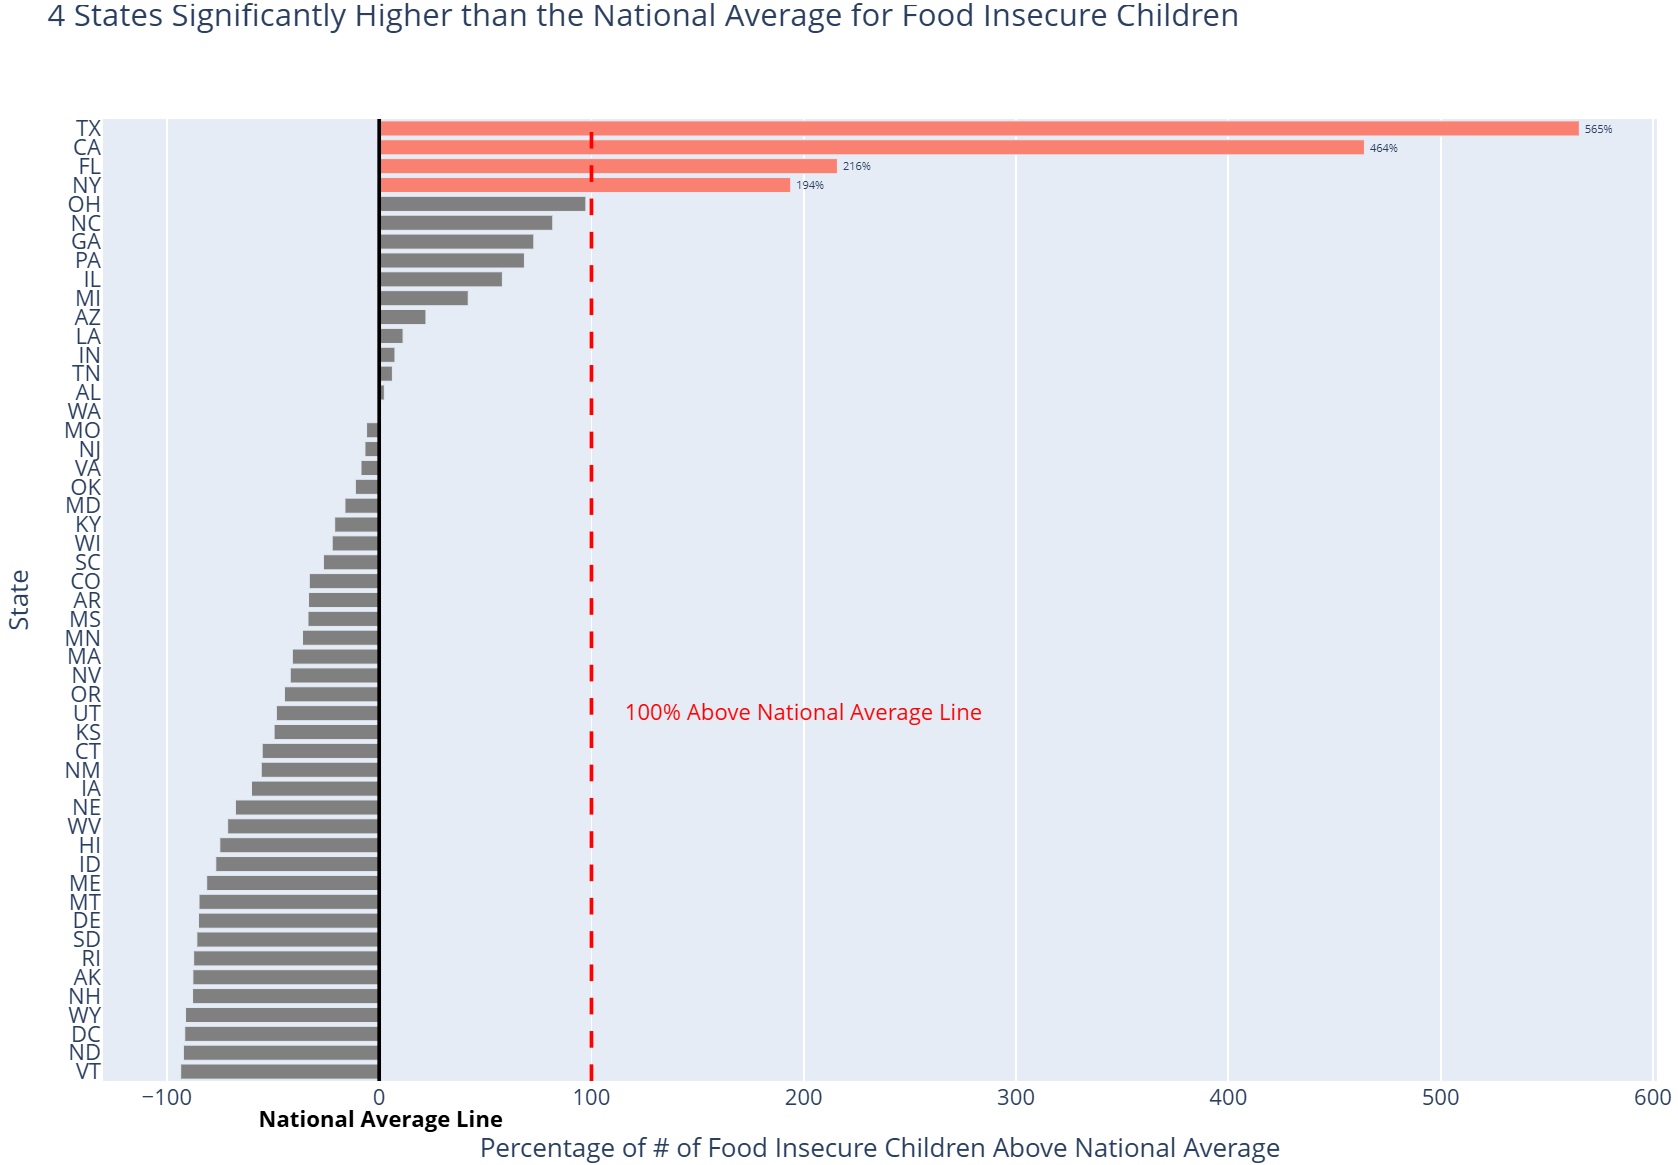

In [9]:
Image('2.png', width = 800, height = 600)

## Plot 5: What actions to be taken?

In [10]:
df_child_total = df[['Year', 'State', '# of Food Insecure Children']]
top4 = df_chil[df_chil['is_above_100_percent'] == True]['State'].tolist()
top_states_total = df_child_total[df_child_total['State'].isin(top4)].groupby('State')['# of Food Insecure Children'].mean().reset_index()
total_child = top_states_total['# of Food Insecure Children'].sum()

fig = px.choropleth(
    top_states_total,
    locations = 'State',
    locationmode = 'USA-states',
    scope = 'usa',
    color = '# of Food Insecure Children',
    color_continuous_scale = 'reds',
    
    title = f'On Average Over <b style="color:red; font-size: 25px"> 4 Million </b> children are lacking food in these <b style="color:red">top 4 </b>States.<br>We should prioritize the fundings to them.',
    subtitle = 'Data Source: Feeding America (2019-2022 Average)'
    )

#Annotate the states:
fig.add_trace(
    go.Scattergeo(
        locations=top_states_total['State'],
        locationmode='USA-states',
        mode='text',
        text=top_states_total['State'],
        textfont=dict(size=16, color="black"),
        showlegend=False
    )
)

fig.update_layout(
    width=800,
    height=500
)

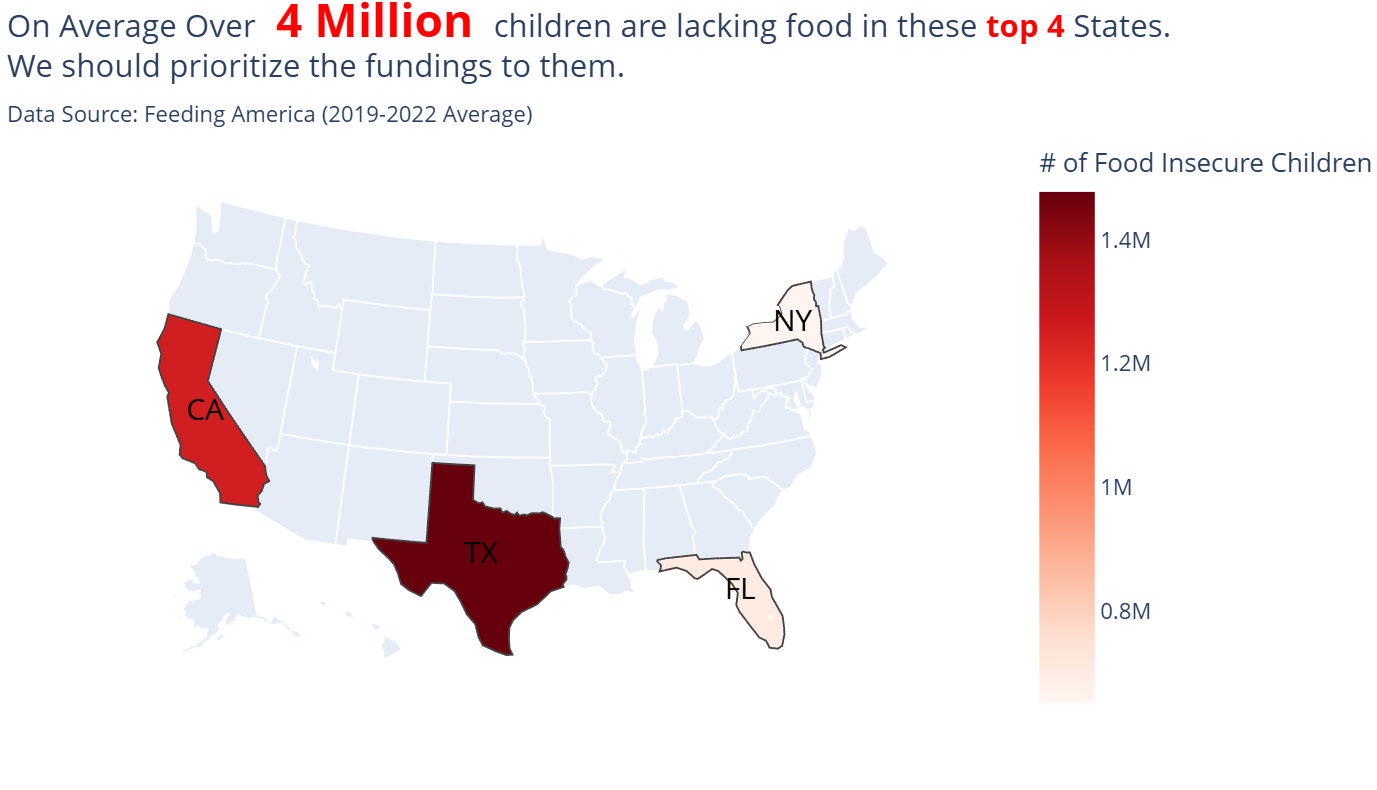

In [11]:
Image('3.png', width=800, height=600)

Conclusion:

Given the strong financial global presence of the U.S., food insecurity would seem like an unrealistic national issue. However, according to the data provided by Feeding America and the U.S. Census Bureau, the number of individuals experiencing food insecurity is staggering. Over 51% of the states in the U.S. have over 500,000 individuals experiencing food insecurity. Among these individuals, children are being affected the most as they lack the ability to gather food or generate income. Food insecurity has a strong correlation to poverty, implying that households that fall below the poverty line are likely to experience food insecurity. There is also a strong disparity in the number of children experiencing food insecurity. Texas has the highest number of children with food insecurity (approx. 1.4 million), which is over $500\%$ higher than the national average for children with food insecurity. With these shocking statistics, policymakers should prioritize funding to the states showing the greatest need (those over $100\%$ higher than the national average).